201911012 Yeongjae Kong

(1) Run the PCA and kernel PCA functions on the Digit-2-Space (100 training images used in
Assignment 3). Plot the mean image and the first 10 eigenvectors (as images). Plot the eigenvalues (in
decreasing order) as a function of dimension. Describe what you find in both plots. 

In [54]:
#bring image set
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def samples(x,y):
    temp = []
    data = []
    label = []
    for i in range(len(y)):
        temp.append([x[i],y[i]])
    np.random.shuffle(temp)
    for i in range(10):
        k = 0
        for j in range(len(temp)):
            if k >= 100:
                break
            if temp[j][1] == i:
                data.append(temp[j][0])
                label.append(temp[j][1])
                k += 1
    return np.array(data), np.array(label)

x_train, y_train = samples(x_train, y_train)

#Convert each image to 1D array
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

# Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

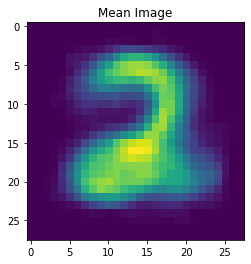

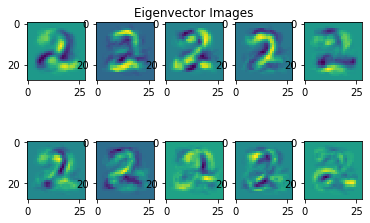

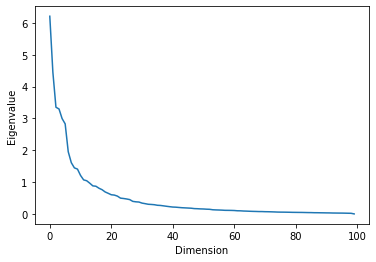

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 100)
x_transformed = pca.fit_transform(x_train[200:300])
mean_image = pca.mean_

#Mean Image 
plt.figure()
plt.title('Mean Image')
plt.imshow(np.reshape(mean_image, (28, 28)))

#Eigenvector Image
plt.figure()
plt.title('10 Eigenvector Images')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28))
    if i == 2:
        plt.title('Eigenvector Images')
plt.show()

#function of dimension
plt.plot(range(100), list(pca.explained_variance_))
plt.xlabel('Dimension')
plt.ylabel('Eigenvalue')
plt.show()

Discussion : If you look at the eigenvector for 2, you can see that the factor for 2 is extracted quite well. (Yellow part is eigenvector)
As the dimension gets lower, it can be seen that the variance becomes smaller. Since the variance of the upper eigenvalue is large, it is implied that a high dimension index will be an important factor to distinguish digit2.

(2) Run the PCA and kernel PCA functions on all 1000 training images used in Assignment 3. Plot the
mean image and the first 10 eigenvectors (as images). Plot the eigenvalues (in decreasing order) as a
function of dimension. Describe what you find in both plots. Compare these plots to the ones you created
in (1)

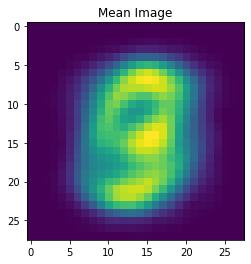

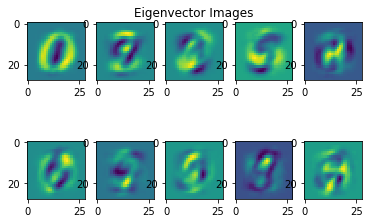

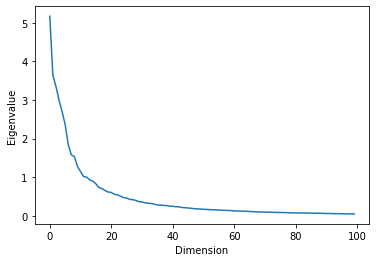

In [56]:
pca = PCA(n_components = 100)
x_transformed = pca.fit_transform(x_train)

#Mean image
mean_image = pca.mean_
plt.figure()
plt.title('Mean Image')
plt.imshow(np.reshape(mean_image, (28, 28)))

#Eigenvector
plt.figure()
plt.title('10 Eigenvector Images')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28))
    if i == 2:
        plt.title('Eigenvector Images')
plt.show()

#function of dimension
plt.plot(range(100), list(pca.explained_variance_))
plt.xlabel('Dimension')
plt.ylabel('Eigenvalue')
plt.show()

Discussion : Looking at the eigenvalue, it can be seen that the variance decreases as the dimension index decreases as in (1). It may mean that the smaller the Dimension, the more it will take charge of the classification of details.

(3) Run K-means clustering on the reduced features using the PCA and kernel PCA, respectively. Then,
classify the MNIST test data set using a nearest-neighbor classifier like Assignment 3. Compute accuracy
scores and compare them with the accuracy in Assignment 3. 

In [139]:
# (3): PCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import MiniBatchKMeans

pca = PCA(n_components = 100)
x_train_transformed = pca.fit_transform(x_train)
x_train_inverse = pca.inverse_transform(x_transformed)
x_test_transformed = pca.fit_transform(x_test)
x_test_inverse = pca.inverse_transform(x_test_transformed)

def retrieve_info(cluster_labels, y_train):
    reference_labels = {}
    for i in range(10):
        index = np.where(cluster_labels == i,1,0)
        reference_labels[i] = np.bincount(y_train[index==1]).argmax()
    return reference_labels

kmeans = MiniBatchKMeans(n_clusters = 10)
kmeans.fit(x_train_inverse)
y_pred_kmeans = kmeans.labels_

reference_labels = retrieve_info(y_pred_kmeans, y_train)
number_labels = np.random.rand(len(y_pred_kmeans))
for i in range(len(y_pred_kmeans)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print("accuracy of kmeans with PCA: ", accuracy_score(number_labels, y_train))


accuracy of kmeans with PCA:  0.511


In [140]:
kpca = KernelPCA(n_components = 100, fit_inverse_transform = 'True')

kpca_x_train_transformed = kpca.fit_transform(x_train)
kpca_x_train_inverse = kpca.inverse_transform(kpca_x_train_transformed)
kpca_x_test_transformed = kpca.fit_transform(x_test)
kpca_x_test_inverse = kpca.inverse_transform(kpca_x_test_transformed)

kpca_kmeans = MiniBatchKMeans(n_clusters = 10)
kpca_kmeans.fit(kpca_x_train_inverse)
y_pred_kmeans = kpca_kmeans.labels_

reference_labels = retrieve_info(y_pred_kmeans, y_train)
kpca_number_labels = np.random.rand(len(y_pred_kmeans))
for i in range(len(y_pred_kmeans)):
    kpca_number_labels[i] = reference_labels[kpca_kmeans.labels_[i]]
print("accuracy of kmeans with KernelPCA: ", accuracy_score(kpca_number_labels, y_train))

accuracy of kmeans with KernelPCA:  0.514


Discussion : accuracy of kmeans with PCA : 0.511, accuracy of kmeans with KernelPCA : 0.514, accuracy of kmeans : 0.52(in hw3). It can be seen that while certain shapes of numbers were more accurately identified, the results were partially worse than those without pca. Therefore, there was no significant difference in the overall accuracy.

(4) Visualize 3 correctly classified and 3 incorrectly classified images for each class. Explain your
findings.

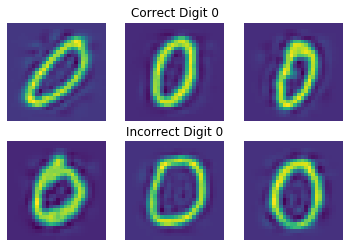

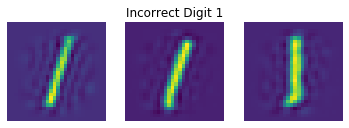

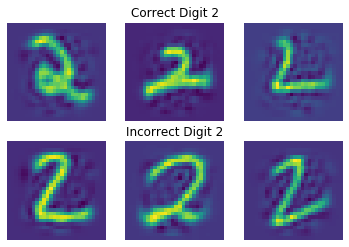

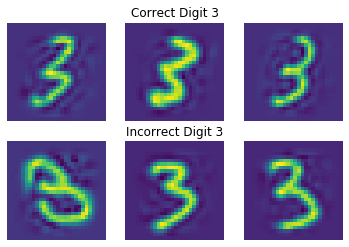

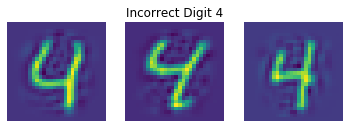

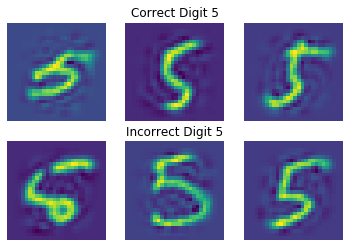

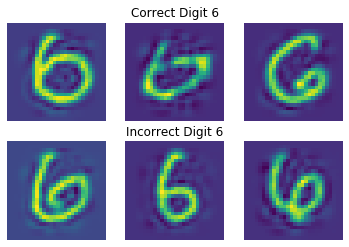

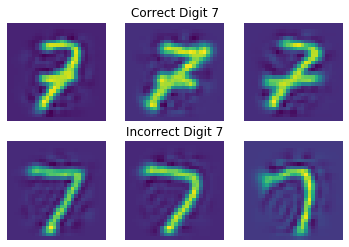

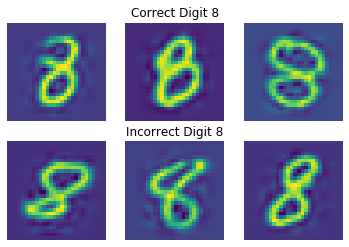

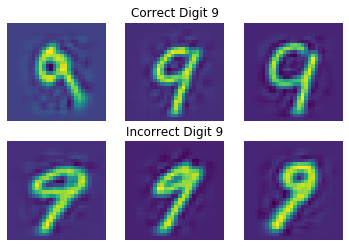

In [145]:
#PCA
predict = kmeans.fit_predict(x_test_inverse)
for i in range(10):
    cor = []
    incor = []
    for j in range(len(y_test)):
        if y_test[j] == predict[j] and y_test[j] == i:
            cor.append(x_test_inverse[j].reshape(28, 28))
        if len(cor) == 3:
            cor = np.array(cor) 
            break
    for j in range(len(y_test)):
        if y_test[j] != predict[j] and y_test[j] == i:
            incor.append(x_test_inverse[j].reshape(28, 28))
        if len(incor) == 3:
            incor = np.array(incor)
            break
            
    plt.figure()
    plt.title('PCA')    
    for k in range(len(cor)):
        plt.subplot(2, 3, k + 1)
        plt.imshow(cor[k])
        plt.axis('off')
        if k == 1:
            plt.title("Correct Digit %d" % i)
        
    for k in range(len(incor)):
        plt.subplot(2, 3, k + 4)
        plt.imshow(incor[k])
        plt.axis('off')
        if k == 1:
            plt.title("Incorrect Digit %d" % i)

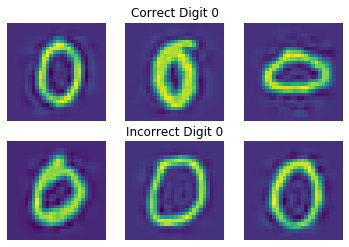

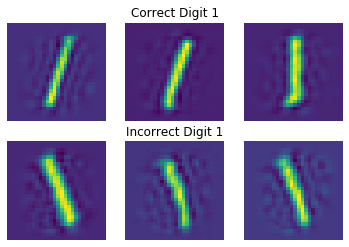

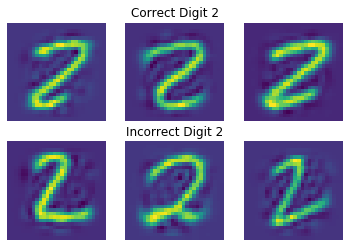

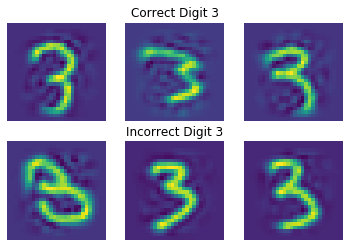

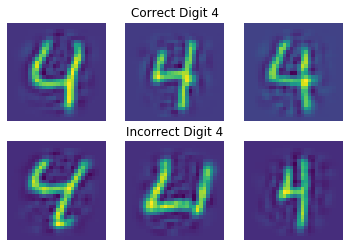

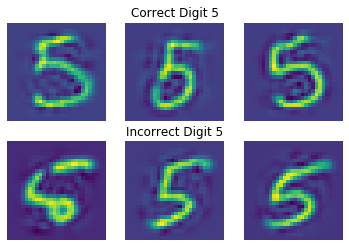

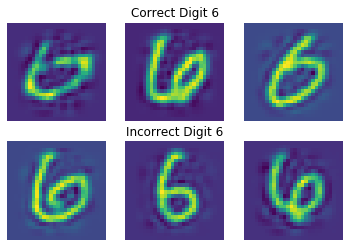

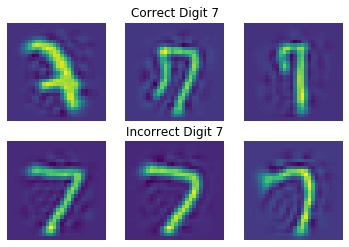

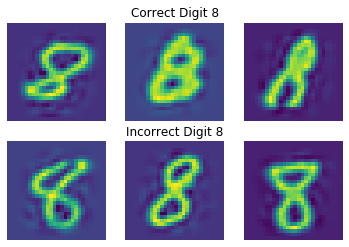

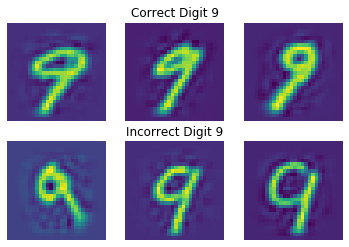

In [149]:
#kernel PCA
predict = kmeans.fit_predict(kpca_x_test_inverse)
for i in range(10):
    cor = []
    incor = []
    for j in range(len(y_test)):
        if y_test[j] == predict[j] and y_test[j] == i:
            cor.append(x_test_inverse[j].reshape(28, 28))
        if len(cor) == 3:
            cor = np.array(cor) 
            break
    for j in range(len(y_test)):
        if y_test[j] != predict[j] and y_test[j] == i:
            incor.append(x_test_inverse[j].reshape(28, 28))
        if len(incor) == 3:
            incor = np.array(incor)
            break
            
    plt.figure()
    for k in range(len(cor)):
        plt.subplot(2, 3, k + 1)
        plt.imshow(cor[k])
        plt.axis('off')
        if k == 1:
            plt.title("Correct Digit %d" % i)
        
    for k in range(len(incor)):
        plt.subplot(2, 3, k + 4)
        plt.imshow(incor[k])
        plt.axis('off')
        if k == 1:
            plt.title("Incorrect Digit %d" % i)

Discussion : In the case of pca, there were cases where the correct number could not be found completely (in 1, 4). I couldn't find the reason, so I posted the question on the discussion board.
Also, It seems to be classifying features that are difficult to find with the human eye.